<a href="https://colab.research.google.com/github/HSN51/Data-Analysis-Project/blob/main/VeriAnaliziProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Iris veri setini yükleyelim
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [2]:
# Veri setinin ilk birkaç satırını görüntüleyelim
data.head()

# Veri seti hakkında genel bilgi
data.info()

# Temel istatistiksel bilgileri görüntüleyelim
data.describe()

# Keşifsel Veri Analizi (EDA)

# Eksik verileri kontrol edelim
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

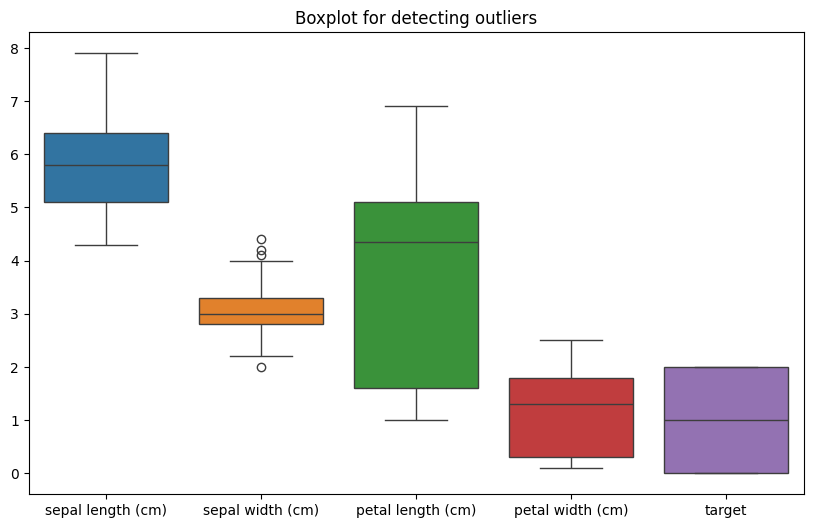

In [4]:
# Aykırı Değer Tespiti ve Temizleme
# Sayısal sütunlar üzerinde aykırı değerleri tespit edelim
numeric_data = data.select_dtypes(include=[np.number])
# Boxplot ile aykırı değerleri görselleştirelim
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title('Boxplot for detecting outliers')
plt.show()


In [5]:
# Aykırı değerlerin IQR yöntemiyle tespit edilmesi ve temizlenmesi
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri temizleyelim
numeric_data = numeric_data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Temizlenmiş sayısal verileri orijinal veri setine geri ekleyelim
for column in numeric_data.columns:
    data[column] = numeric_data[column]

# Temizlenmiş veri setinin ilk birkaç satırını görüntüleyelim
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Temel İstatistiksel Analizler

# Temel istatistiksel ölçümleri inceleyelim
print("Mean:\n", numeric_data.mean())
print("Median:\n", numeric_data.median())
print("Standard Deviation:\n", numeric_data.std())

Mean:
 sepal length (cm)    5.856849
sepal width (cm)     3.040411
petal length (cm)    3.806849
petal width (cm)     1.220548
target               1.020548
dtype: float64
Median:
 sepal length (cm)    5.8
sepal width (cm)     3.0
petal length (cm)    4.4
petal width (cm)     1.3
target               1.0
dtype: float64
Standard Deviation:
 sepal length (cm)    0.834093
sepal width (cm)     0.397853
petal length (cm)    1.758042
petal width (cm)     0.759393
target               0.817643
dtype: float64


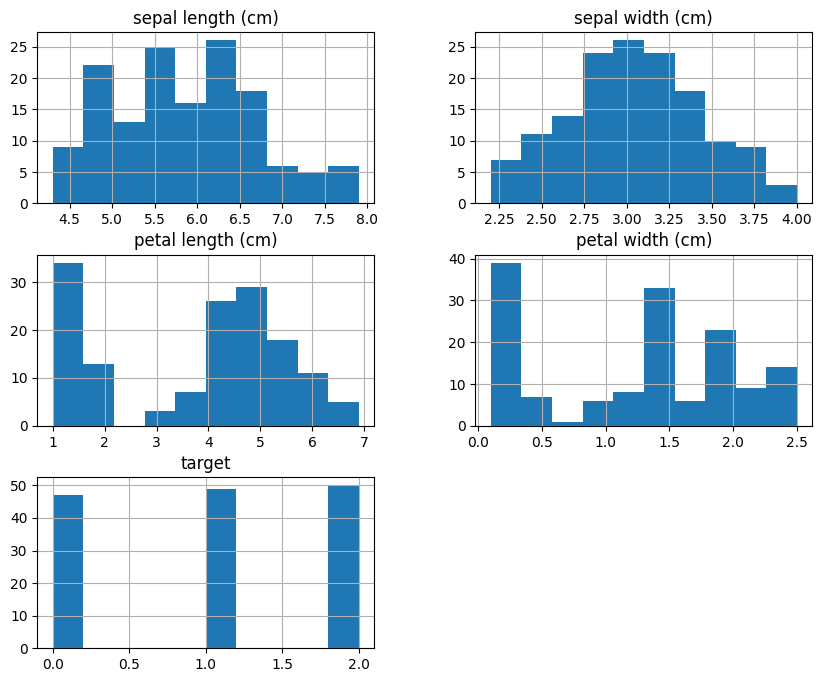

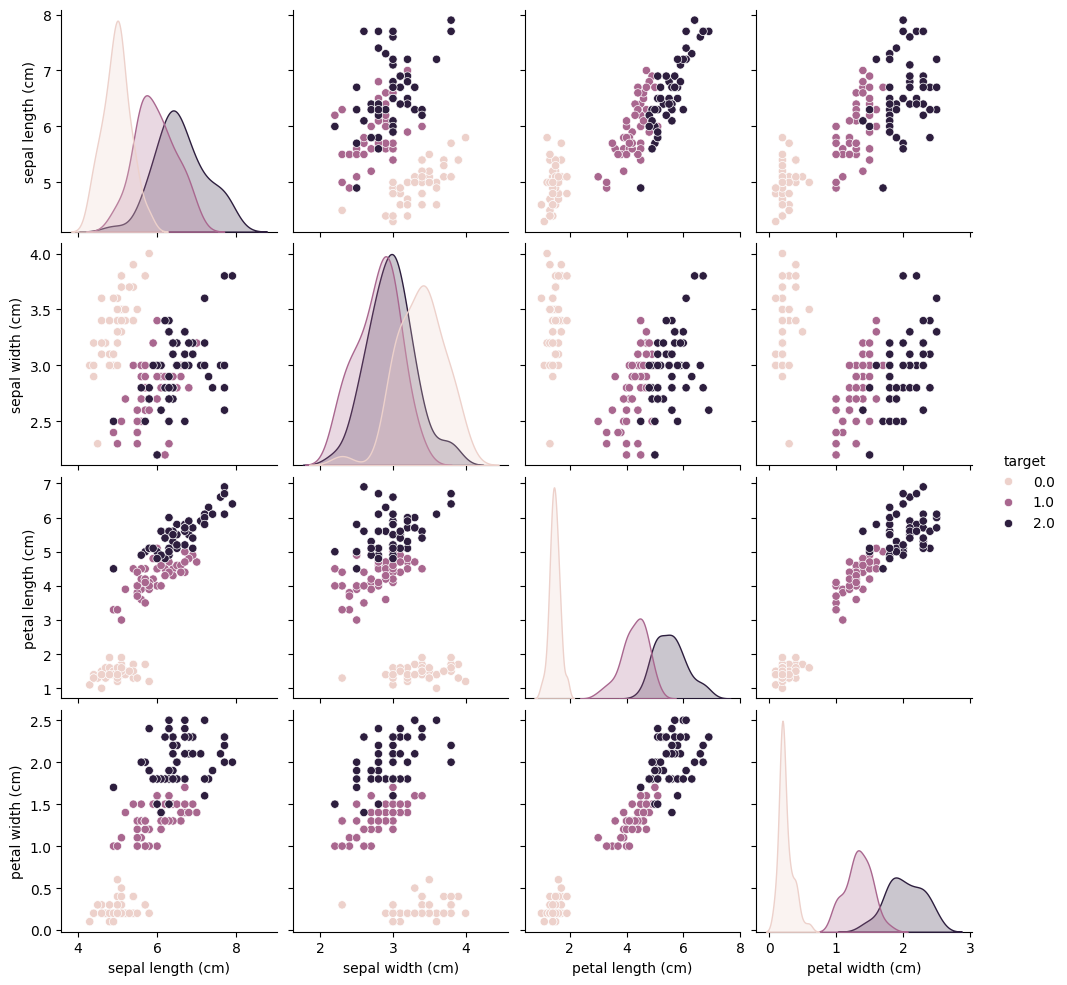

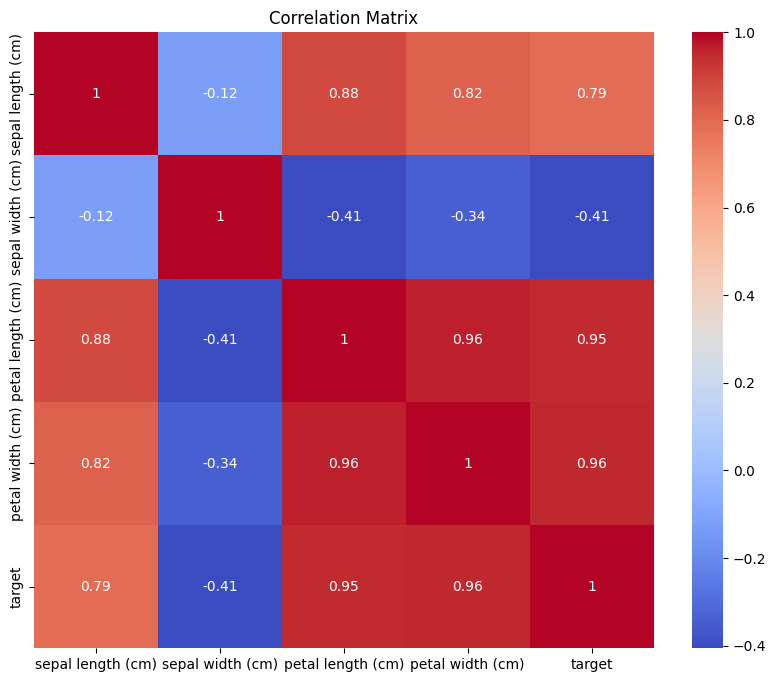

In [7]:
# Görselleştirme

# Histogramlar
numeric_data.hist(figsize=(10, 8))
plt.show()

# Scatter plot
sns.pairplot(data, hue='target')
plt.show()

# Değişkenler Arası İlişkilerin Analizi

# Korelasyon matrisi
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Özellik Mühendisliği (Feature Engineering)

# Yeni özellikler oluşturma (örneğin, sepal length ve sepal width çarpımı)
data['sepal_area'] = data['sepal length (cm)'] * data['sepal width (cm)']
data['petal_area'] = data['petal length (cm)'] * data['petal width (cm)']

# Yeni özelliklerin ilk birkaç satırını görüntüleyelim
print(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal_area', 'petal_area']].head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sepal_area  petal_area  
0       17.85        0.28  
1       14.70        0.28  
2       15.04        0.26  
3       14.26        0.30  
4       18.00        0.28  


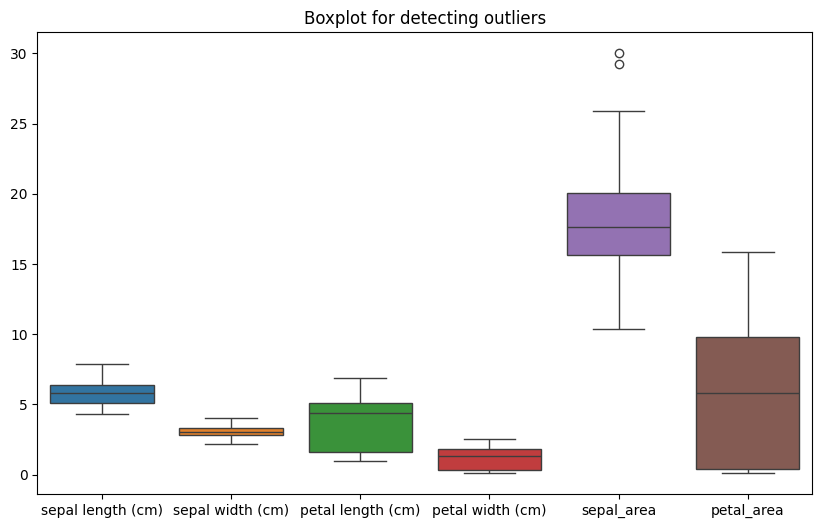

sepal length (cm)    4
sepal width (cm)     4
petal length (cm)    4
petal width (cm)     4
target               4
sepal_area           4
petal_area           4
dtype: int64


In [9]:
# Aykırı değerleri tespit etme
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal_area', 'petal_area']])
plt.title('Boxplot for detecting outliers')
plt.show()

# Eksik verileri tekrar kontrol edelim
print(data.isnull().sum())